
## Credit Card Fraud Detection

#### PROBLEM STATEMENT: 
 We are given the data of transactions made by credit cards in September 2013 by european cardholders.
 The aim of the project is to identify the fraudlent credit card transaction. 

# INTRODUCTION:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [29]:
 #Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec 

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc
from sklearn.metrics import plot_roc_curve
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [30]:
#importing the data and creating the dataframe
data=pd.read_csv('E:\data\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data is mostly transformed from its original form, for confidentiality reasons.It contains only numerical input variables which are the result of a PCA transformation.

## Exploratory Data Analysis

In [31]:
print("There are {} rows and {} Features in the given dataset.".format(data.shape[0],data.shape[1]))

There are 284807 rows and 31 Features in the given dataset.


In [32]:
print("Features in the dataset: \n",data.columns)

Features in the dataset: 
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [33]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
#checking the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [35]:
data.isnull().values.any()

False

In [36]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
fraudpercent = round((len(fraud)/float(len(valid)))*100,2) 
print("percentage of fraud transaction: ",fraudpercent,"%") 
print('fraud transaction :',len(fraud))
print('valid transaction :', len(valid))

percentage of fraud transaction:  0.17 %
fraud transaction : 492
valid transaction : 284315


* As we can see from the figures, our original dataset is very imbalanced. Most of the transactions are non-fraud.

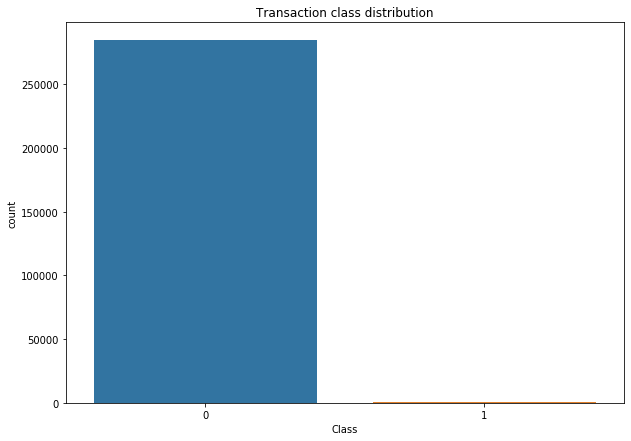

In [37]:
#plotting the count plot of the distribution of class.
fig=plt.figure(figsize=(10,7))
plt.title('Transaction class distribution')
sns.countplot(x ='Class', data = data) 
plt.show()

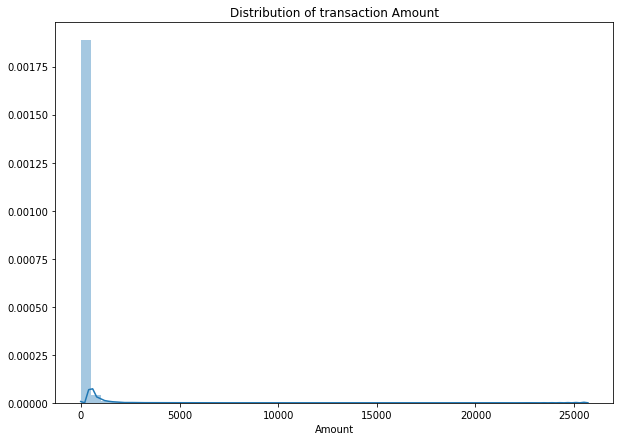

In [38]:
# Histogram showing the Distribution of Amount
plt.figure(figsize= [10,7])
sns.distplot(data.Amount)
plt.title('Distribution of transaction Amount')
plt.show()

From the histogram we can see the Amount feature is very skewed.

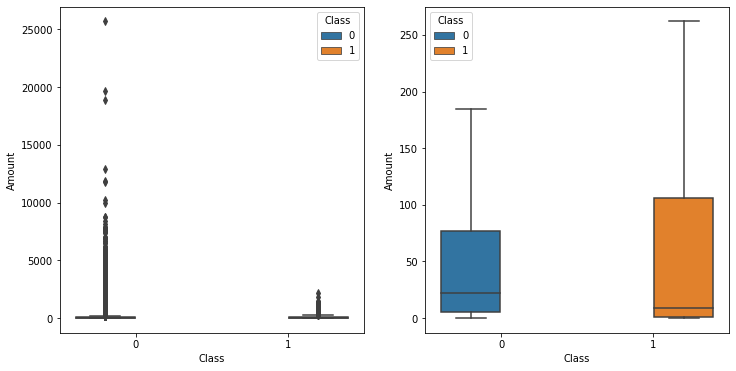

In [39]:
plt.subplots(1, 2, figsize=(12,6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', hue='Class', data=data, showfliers=True)

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', hue='Class', data=data, showfliers=False);

In [40]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [41]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

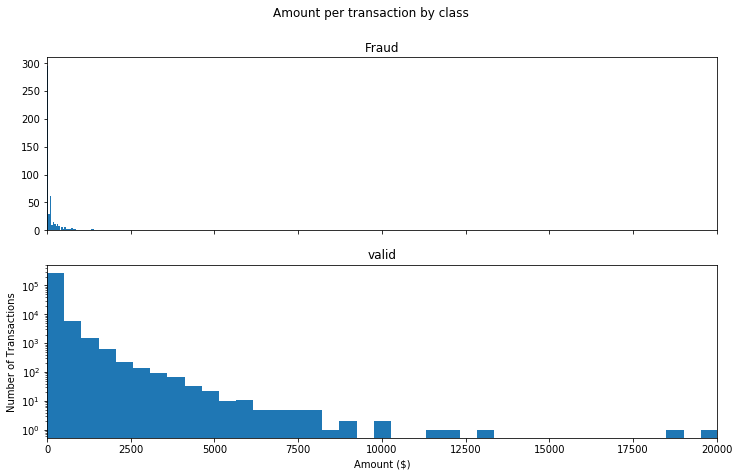

In [42]:
#plotting histogram for distribution of amount of transaction
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,7), sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(valid.Amount, bins = bins)
ax2.set_title('valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

We can see from the graph and figures, most of the transactions are small amount. Fraudulent transactions have a maximum value far less than normal transactions.

In [43]:
data['Time_in_hours']=round(data['Time']/(60*60)).astype(int)

Text(0, 0.5, 'Relative Frequency')

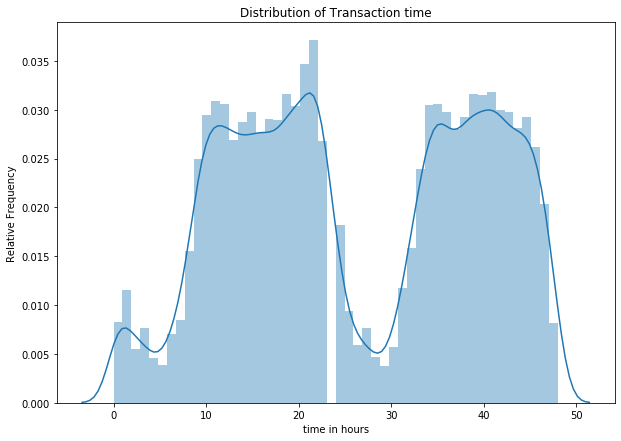

In [44]:
#plotting distplot for distribution of transaction time
plt.figure(figsize=(10,7))
sns.distplot(data['Time_in_hours'])
plt.title('Distribution of Transaction time')
plt.xlabel('time in hours')
plt.ylabel('Relative Frequency')

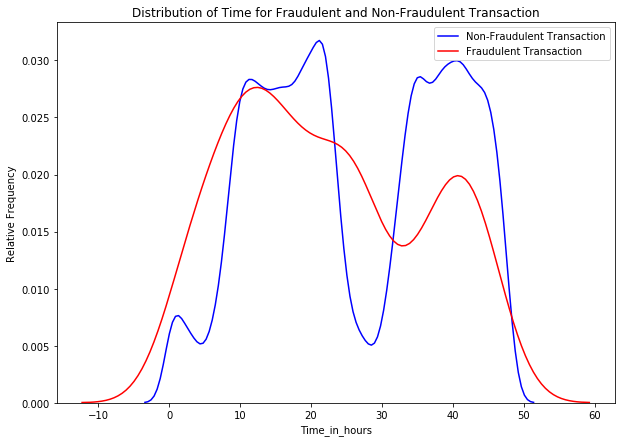

In [45]:
# Line Diagram showing the Relative Frequency Distribution of Time for Fraudulent and Non-Fraudulent Transaction
plt.figure(figsize = [10, 7])
sns.distplot(data[data.Class == 0].Time_in_hours, hist = False, color = 'blue', label = "Non-Fraudulent Transaction")
sns.distplot(data[data.Class == 1].Time_in_hours, hist = False, color = 'red', label = "Fraudulent Transaction")
plt.ylabel('Relative Frequency')
plt.title('Distribution of Time for Fraudulent and Non-Fraudulent Transaction')
plt.show()

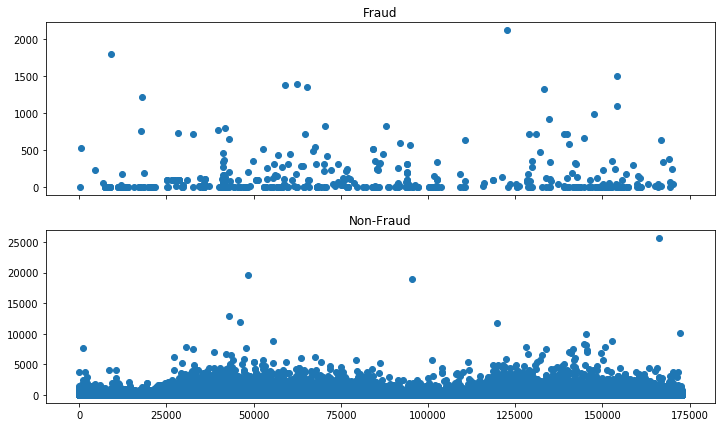

In [46]:
#comparing the amount and time feature
f,(ax1,ax2)= plt.subplots(2,1, sharex= True, figsize=(12,7))
ax1.scatter(data.Time[data.Class == 1],data.Amount[data.Class==1])
ax1.set_title('Fraud')
ax2.scatter(data.Time[data.Class == 0],data.Amount[data.Class == 0])
ax2.set_title('Non-Fraud')
plt.show()

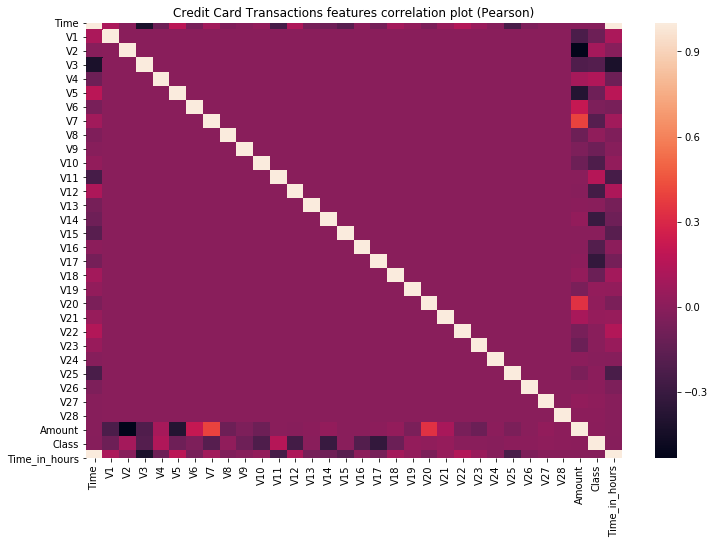

In [47]:
#Correlation Matrices
plt.figure(figsize= (12,8))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr=data.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

* V17, V14, V12 and V10 are negatively correlated
* V2, V4, V11, and V19 are positively correlated   

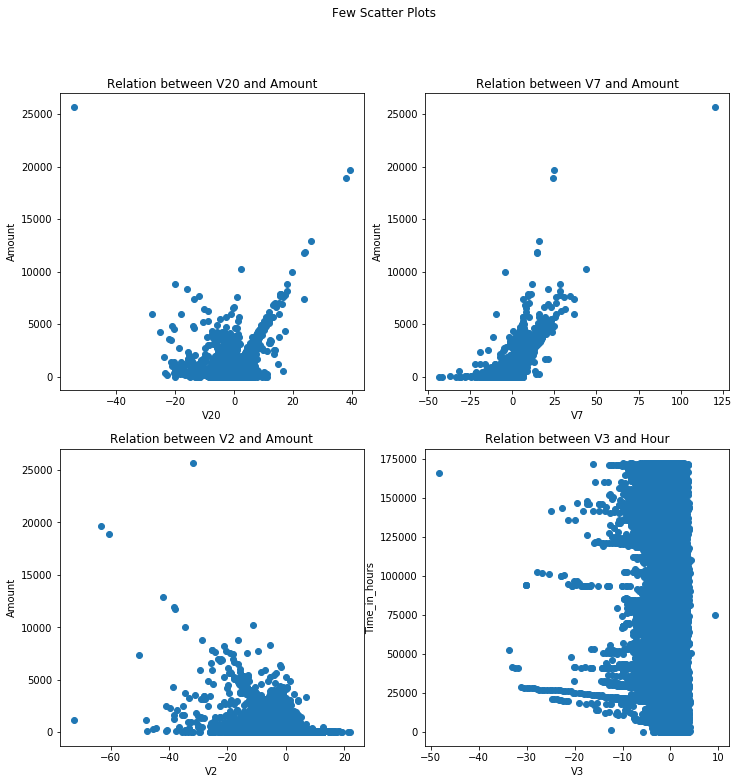

In [48]:
# Few Scatter Plotsto check the Relation between a few Pair of Variables
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [12,12])

ax[0,0].scatter(x = data.V20, y = data.Amount)
ax[0,0].set_xlabel('V20')
ax[0,0].set_ylabel('Amount')
ax[0,0].set_title('Relation between V20 and Amount')

ax[0,1].scatter(x = data.V7, y = data.Amount)
ax[0,1].set_xlabel('V7')
ax[0,1].set_ylabel('Amount')
ax[0,1].set_title('Relation between V7 and Amount')

ax[1,0].scatter(x = data.V2, y = data.Amount)
ax[1,0].set_xlabel('V2')
ax[1,0].set_ylabel('Amount')
ax[1,0].set_title('Relation between V2 and Amount')

ax[1,1].scatter(x = data.V3, y = data.Time)
ax[1,1].set_xlabel('V3')
ax[1,1].set_ylabel('Time_in_hours')
ax[1,1].set_title('Relation between V3 and Hour')

fig.suptitle('Few Scatter Plots')
plt.show()

In [49]:
#Selecting only the anonymized features 
v_features=data.iloc[:,1:29]


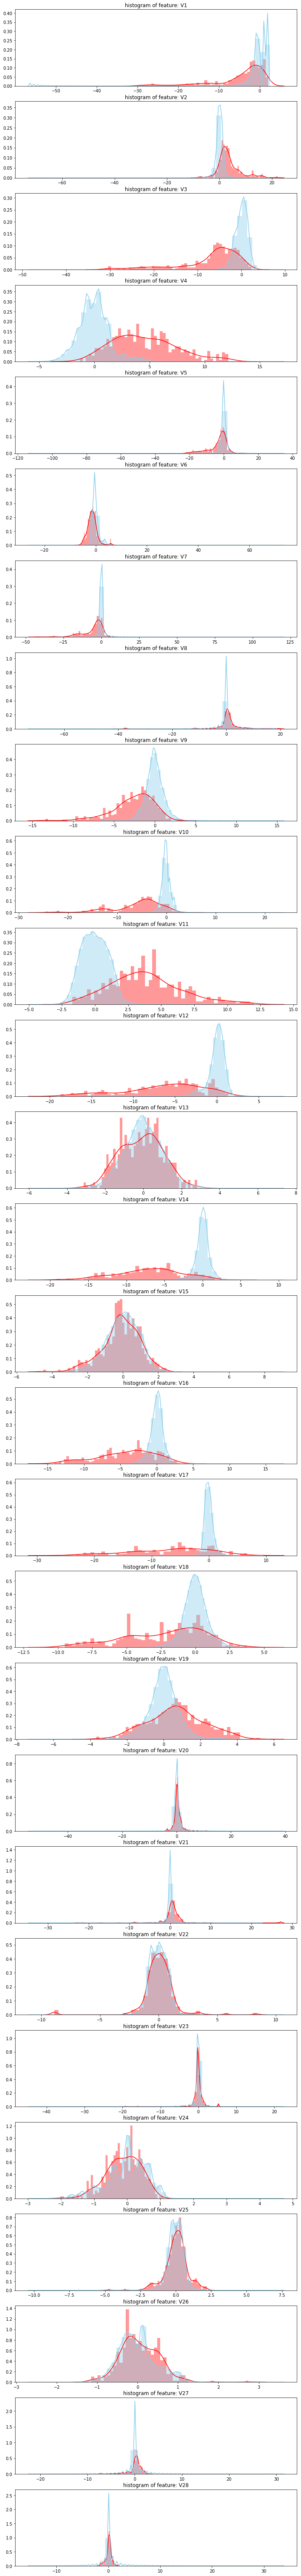

In [50]:
#plotting histograms to analyze the anonymized featured  
plt.figure(figsize=(12,28*4))
gs=gridspec.GridSpec(28,1)
for i, cn in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50, color='red')
    sns.distplot(data[cn][data.Class == 0], bins=50, color='skyblue')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

we can see from the graphs that the fraudlent data is more skewed and non-fraudlend data is more centered around zero.

In [51]:
print('No. of duplicate record:',data.duplicated().sum())

No. of duplicate record: 1081


In [52]:
#dropping the duplicate data
data=data.drop_duplicates()

# preprocessing

The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).

* Since most of our data has already been scaled we will scale the columns comprise of Time and Amount. Time and amount should be scaled as the other columns.

In [53]:
#scaling Time and Amount columns
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler= RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))


In [54]:
data.drop(['Time','Amount','Time_in_hours'],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


## 1. Undersampling using NearMiss Algorithm 

* From the above analysis we can see that the original dataset is heavily imbalanced, Our classification models will assume that in most cases there are no frauds.

* Undersampling basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting. 

In [55]:
x= data.drop('Class', axis=1)
y=data['Class']

####    Split the data into test and train sets

In [56]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [57]:
ns=NearMiss(0.8)
x_train_ns, y_train_ns = ns.fit_sample(x1_train,y1_train)
print('After Undersampling, the shape of train_X: {}'.format(x_train_ns.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_ns.shape))

print("The number of classes before fit {}".format(Counter(y1_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

After Undersampling, the shape of train_X: (769, 30)
After Undersampling, the shape of train_y: (769,) 

The number of classes before fit Counter({0: 198266, 1: 342})
The number of classes after fit Counter({0: 427, 1: 342})


In [58]:
Counter(y1_test)

Counter({0: 84987, 1: 131})

#### 1. random forest classifier

In [59]:
#random forest classifier  on undersampled data

rn_classifier = RandomForestClassifier(bootstrap=True,
                               class_weight = 'balanced',
                               criterion='entropy',
                               max_depth=10,
                               min_samples_leaf=10, 
                               
                               random_state=2020)
rn_classifier.fit(x_train_ns, y_train_ns.ravel())

rn_pred=rn_classifier.predict(x1_test)

print('Confusion Matrix: ')
print(confusion_matrix(y1_test, rn_pred))
print('\n Accuracy score: {}'.format(accuracy_score(y1_test,rn_pred)))
print('\n ROC AUC score: ', roc_auc_score(y1_test, rn_pred))
print('\n Classification Report: ')
print(classification_report(y1_test, rn_pred))

Confusion Matrix: 
[[36803 48184]
 [    5   126]]

 Accuracy score: 0.4338565285838483

 ROC AUC score:  0.6974373808585184

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     84987
           1       0.00      0.96      0.01       131

    accuracy                           0.43     85118
   macro avg       0.50      0.70      0.30     85118
weighted avg       1.00      0.43      0.60     85118



Due to undersampling of majority class, its recall has decreased to 43 % because of increase in false positives. So this is not considered as a good model.

#### 2. Logistic regresssion

In [60]:
#logistic regresssion on undersampled data

log_reg = LogisticRegression()
log_reg.fit(x_train_ns,y_train_ns.ravel())
log_reg_pred = log_reg.predict(x1_test)

print('Confusion Matrix: ')
print(confusion_matrix(y1_test, log_reg_pred))
print('\n Accuracy score: {}'.format(accuracy_score(y1_test,log_reg_pred)))
print('\n ROC AUC score: ', roc_auc_score(y1_test, log_reg_pred))
print('\n Classification Report: ')
print(classification_report(y1_test, log_reg_pred))

Confusion Matrix: 
[[57943 27044]
 [    9   122]]

 Accuracy score: 0.6821706337084988

 ROC AUC score:  0.8065421680567761

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     84987
           1       0.00      0.93      0.01       131

    accuracy                           0.68     85118
   macro avg       0.50      0.81      0.41     85118
weighted avg       1.00      0.68      0.81     85118



#### 3.support vector classifier

In [61]:
#support vector classifier on undersampled data

from sklearn.svm import SVC
svc_clf = SVC(kernel='linear')
svc_clf.fit(x_train_ns,y_train_ns.ravel())
svc_pred = svc_clf.predict(x1_test)

print('Confusion Matrix: ')
print(confusion_matrix(y1_test, svc_pred))
print('\n Accuracy score: {}'.format(accuracy_score(y1_test,svc_pred)))
print('\n ROC AUC score: ', roc_auc_score(y1_test, svc_pred))
print('\n Classification Report: ')
print(classification_report(y1_test, svc_pred))

Confusion Matrix: 
[[55162 29825]
 [    8   123]]

 Accuracy score: 0.6495100918724594

 ROC AUC score:  0.7939976361000698

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     84987
           1       0.00      0.94      0.01       131

    accuracy                           0.65     85118
   macro avg       0.50      0.79      0.40     85118
weighted avg       1.00      0.65      0.79     85118



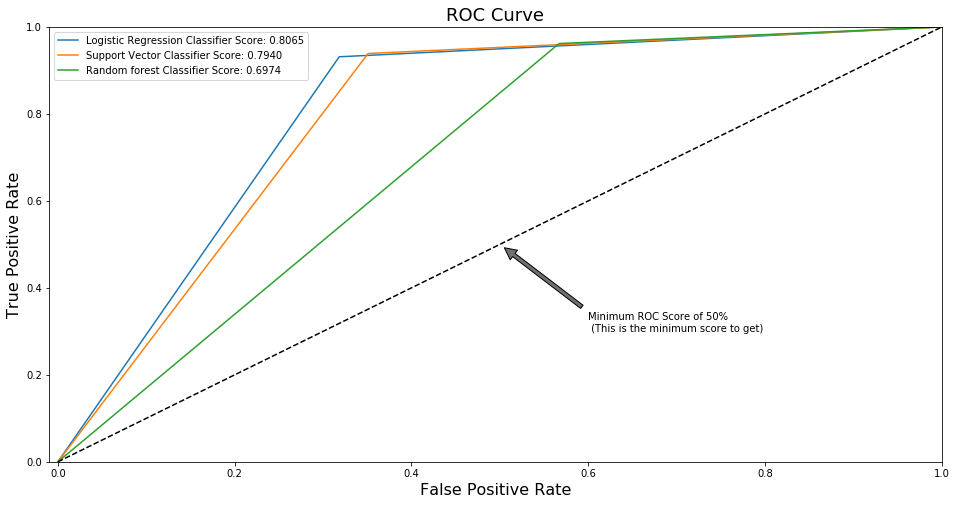

In [62]:
#roc curve
from sklearn.metrics import roc_curve
log_fpr, log_tpr, log_thresold = roc_curve(y1_test, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y1_test, svc_pred)
rn_fpr, rn_tpr, rn_threshold = roc_curve(y1_test, rn_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rn_fpr, rn_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y1_test, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y1_test, svc_pred)))
    plt.plot(rn_fpr, rn_tpr, label='Random forest Classifier Score: {:.4f}'.format(roc_auc_score(y1_test, rn_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rn_fpr, rn_tpr)
plt.show()

# 2.Oversampling using SMOTE Algorithm

* Using SMOTE algorithm the minority instances are oversampled and made equal to majority class. Thus handling the imbalanced data and reducing the overfitting

In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y1_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y1_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(0.75) 
x_train_res, y_train_res = sm.fit_sample(x1_train, y1_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 342
Before OverSampling, counts of label '0': 198266 

After OverSampling, the shape of train_X: (346965, 30)
After OverSampling, the shape of train_y: (346965,) 

After OverSampling, counts of label '1': 148699
After OverSampling, counts of label '0': 198266


In [64]:
#Logistic regression on oversampled data

lr1 = LogisticRegression() 
lr1.fit(x_train_res, y_train_res )
predictions = lr1.predict(x1_test) 
  
# print classification report 
print(classification_report(y1_test, predictions)) 
print(confusion_matrix(y1_test,predictions))
print(accuracy_score(y1_test,predictions))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84987
           1       0.07      0.89      0.12       131

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.56     85118
weighted avg       1.00      0.98      0.99     85118

[[83360  1627]
 [   14   117]]
0.9807208815996616


The false positives have decreased as compared to previous models, the recall value of minority class has improved to 89 %. This is a good model compared to the previous one. Recall is great. 

In [65]:
print("ROC-AUC score: ",roc_auc_score(y1_test, predictions))

ROC-AUC score:  0.936992833299965


In [66]:
#random forest classifier on oversampled data

os=SMOTE(0.75)
x_train_ns,y_train_ns=os.fit_sample(x1_train,y1_train)
print("The number of classes before fit {}".format(Counter(y1_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 198266, 1: 342})
The number of classes after fit Counter({0: 198266, 1: 148699})


In [67]:
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)
rn_pred=classifier.predict(x1_test)

print('Confusion Matrix: ')
print(confusion_matrix(y1_test, rn_pred))
print('\n Accuracy score: {}'.format(accuracy_score(y1_test,rn_pred)))
print('\n ROC AUC score: ', roc_auc_score(y1_test, rn_pred))
print('\n Classification Report: ')
print(classification_report(y1_test, rn_pred))


Confusion Matrix: 
[[84973    14]
 [   28   103]]

 Accuracy score: 0.9995065673535563

 ROC AUC score:  0.8930474054541075

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.88      0.79      0.83       131

    accuracy                           1.00     85118
   macro avg       0.94      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [68]:
roc_auc_score(y1_test, rn_pred)

0.8930474054541075

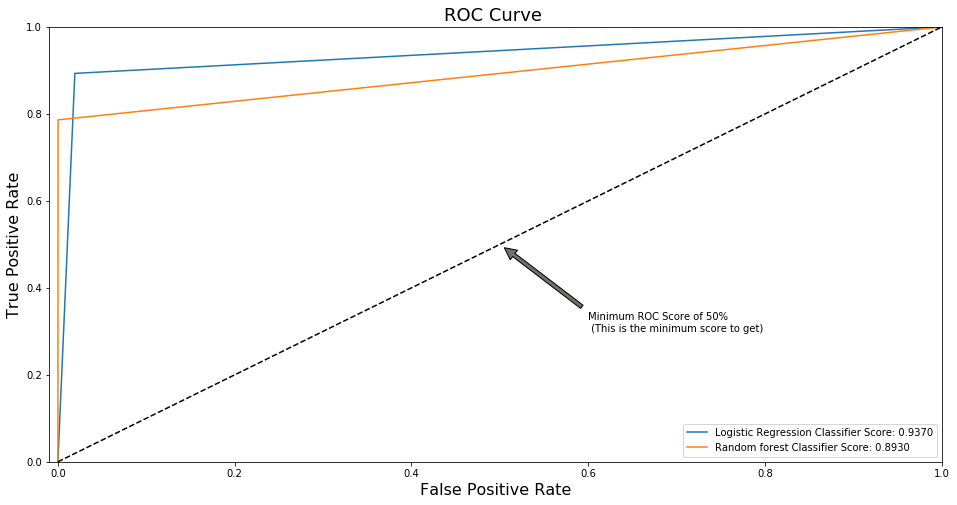

In [69]:
from sklearn.metrics import roc_curve
log_fpr, log_tpr, log_thresold = roc_curve(y1_test, predictions)
rn_fpr, rn_tpr, rn_threshold = roc_curve(y1_test, rn_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr,  rn_fpr, rn_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve ', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y1_test, predictions)))
    plt.plot(rn_fpr, rn_tpr, label='Random forest Classifier Score: {:.4f}'.format(roc_auc_score(y1_test, rn_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rn_fpr, rn_tpr)
plt.show()

In [70]:
average_precision = average_precision_score(y1_test, rn_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


Text(0.5, 1.0, ' Precision-Recall curve: \n Average Precision-Recall Score =0.69')

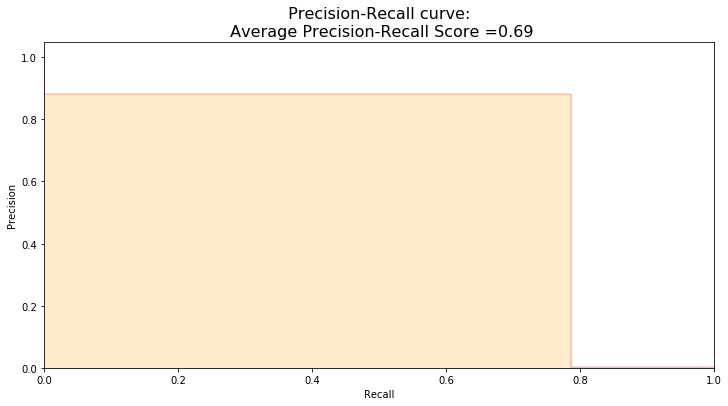

In [71]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y1_test, rn_pred)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [72]:
#adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=11,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

clf.fit(x_train_ns,y_train_ns)
rn_pred=clf.predict(x1_test)

print('Confusion Matrix: ')
print(confusion_matrix(y1_test, rn_pred))
print('\n Accuracy score: {}'.format(accuracy_score(y1_test,rn_pred)))
print('\n ROC AUC score: ', roc_auc_score(y1_test, rn_pred))
print('\n Classification Report: ')
print(classification_report(y1_test, rn_pred))

Confusion Matrix: 
[[83996   991]
 [   16   115]]

 Accuracy score: 0.9881693648816936

 ROC AUC score:  0.9331009942517478

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84987
           1       0.10      0.88      0.19       131

    accuracy                           0.99     85118
   macro avg       0.55      0.93      0.59     85118
weighted avg       1.00      0.99      0.99     85118



# smote with cross validation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = data.drop('Class', axis=1)
y= data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X,y):
    print('Train: ', train_index, 'Test: ', test_index)
    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Train:  [ 30191  30261  30275 ... 283723 283724 283725] Test:  [    0     1     2 ... 56805 56806 56807]
Train:  [     0      1      2 ... 283723 283724 283725] Test:  [ 30191  30261  30275 ... 113535 113536 113537]
Train:  [     0      1      2 ... 283723 283724 283725] Test:  [ 77084  77379  79220 ... 170292 170293 170294]
Train:  [     0      1      2 ... 283723 283724 283725] Test:  [149302 150027 150068 ... 226999 227000 227001]
Train:  [     0      1      2 ... 226999 227000 227001] Test:  [212341 212365 213905 ... 283723 283724 283725]


In [74]:
Counter(y_train)

Counter({0: 226603, 1: 378})

In [75]:
Counter(y_test)

Counter({1: 95, 0: 56650})

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()
log_reg_params = {'penalty': ['l1','none'], 'C': [0.001, 0.01, 1, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

#implementing SMOTE

for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test],prediction))
    recall_lst.append(recall_score(y_train[test],prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    


In [77]:
print('accuracy: {}'.format(np.mean(accuracy_lst)))
print('precision: {}'.format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.9393788799197985
precision: 0.05772288409502707
recall: 0.8966315789473684
f1: 0.106359491311985


In [78]:
Counter(y_test)

Counter({1: 95, 0: 56650})

In [79]:
smote_prediction = best_est.predict(X_test)
print(confusion_matrix(y_test, smote_prediction))
print(classification_report(y_test, smote_prediction))

[[55961   689]
 [   14    81]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56650
           1       0.11      0.85      0.19        95

    accuracy                           0.99     56745
   macro avg       0.55      0.92      0.59     56745
weighted avg       1.00      0.99      0.99     56745



In [80]:
smote_score = accuracy_score(y_test, smote_prediction)
print('accuracy using smote: {}'.format(smote_score))

accuracy using smote: 0.9876112432813464


In [81]:
roc_auc_score(y_test, smote_prediction)

0.9202345891206392

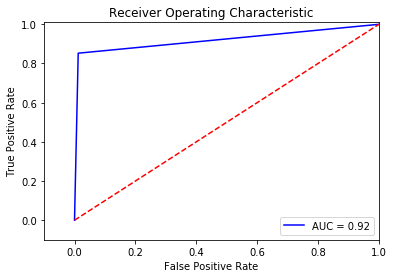

In [82]:
# ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test.ravel(),smote_prediction)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
average_precision = average_precision_score(y_test, smote_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.09


## random forest without appling SMOTE

In [84]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X,y,train_size=0.7)
rn_classifier = RandomForestClassifier()
rn_classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [85]:
Counter(y_test_rf)

Counter({0: 84984, 1: 134})

In [86]:
y_pred=rn_classifier.predict(X_test_rf)
print(confusion_matrix(y_test_rf,y_pred))
print(accuracy_score(y_test_rf,y_pred))
print(classification_report(y_test_rf,y_pred))


[[84979     5]
 [   38    96]]
0.9994948189572124
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.72      0.82       134

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [87]:
roc_auc_score(y_test_rf, y_pred)

0.8581795379218001